In [1]:
!cp /content/drive/My\ Drive/m5/StoreID_0.pickle /content/

In [2]:
import pandas as pd
store_df = pd.read_pickle('StoreID_0.pickle')

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [10.0, 5.0]

In [4]:
store_df

,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,id,item_id,dept_id,cat_id,store_id,state_id,sold,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,0,NaN
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0,0,NaN
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0,0,NaN
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-19,11621,2,6,2016,16,3,2,0,0,0,0,FOODS_3_823_CA_1_validation,1432,2,0,0,0,NaN,2.980469
2016-06-19,11621,2,6,2016,16,3,2,0,0,0,0,FOODS_3_824_CA_1_validation,1433,2,0,0,0,NaN,2.480469
2016-06-19,11621,2,6,2016,16,3,2,0,0,0,0,FOODS_3_825_CA_1_validation,1434,2,0,0,0,NaN,3.980469


In [5]:
item_df = store_df[store_df['item_id']==1437]

In [6]:
item_df

,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,id,item_id,dept_id,cat_id,store_id,state_id,sold,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,11101,1,1,2011,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
2011-01-30,11101,2,1,2011,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
2011-01-31,11101,3,1,2011,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
2011-02-01,11101,4,2,2011,30,4,4,2,1,1,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
2011-02-02,11101,5,2,2011,30,4,4,2,1,0,1,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-15,11620,5,6,2016,30,4,4,2,0,1,1,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,NaN,8.382812
2016-06-16,11620,6,6,2016,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,NaN,8.382812
2016-06-17,11620,7,6,2016,30,4,4,2,0,0,0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,NaN,8.382812


In [7]:
start_date = '01-27-2015'
end_date = '2016-04-24'

In [8]:
item_df = item_df[start_date:end_date][['sold']]

In [16]:
item_df['rolling_mean_56'] = item_df['sold'].rolling(window=56).mean()
item_df['rolling_std_56'] = item_df['sold'].rolling(window=56).std()

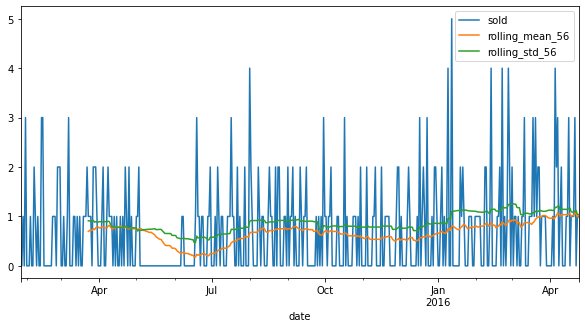

In [17]:
item_df[['sold', 'rolling_mean_56', 'rolling_std_56']].plot()

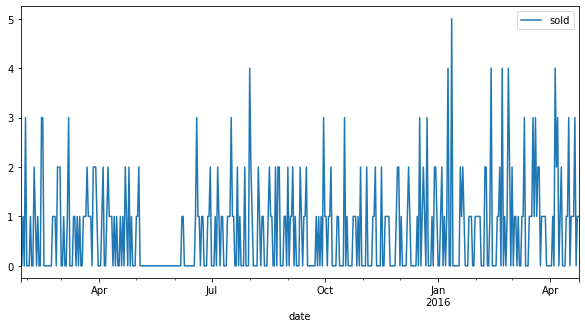

In [9]:
item_df.plot();

In [10]:
item_df['rolling_mean_28'] = item_df['sold'].rolling(window=28).mean()
item_df['rolling_std_28'] = item_df['sold'].rolling(window=28).std()

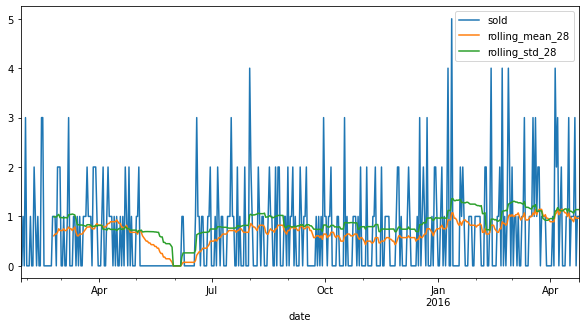

In [11]:
item_df.plot();

In [12]:
item_df['rolling_mean_7'] = item_df['sold'].rolling(window=7).mean()
item_df['rolling_std_7'] = item_df['sold'].rolling(window=7).std()

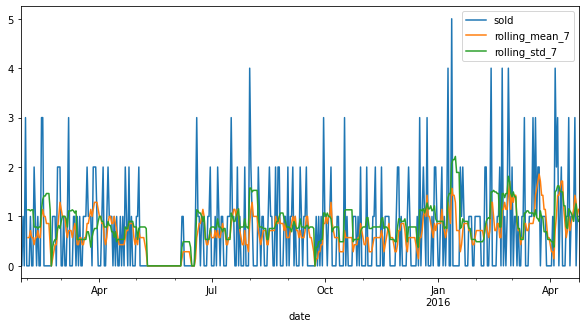

In [13]:
item_df[['sold', 'rolling_mean_7', 'rolling_std_7']].plot();

In [14]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(item_df['sold'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
results

(-19.906651303324054,
 0.0,
 0,
 453,
 {'1%': -3.444868194858831,
  '10%': -2.5701797149735146,
  '5%': -2.867941416548597},
 1156.030466906081)

Is stationary

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(item_df['sold'])

In [29]:
import matplotlib.pyplot as plt


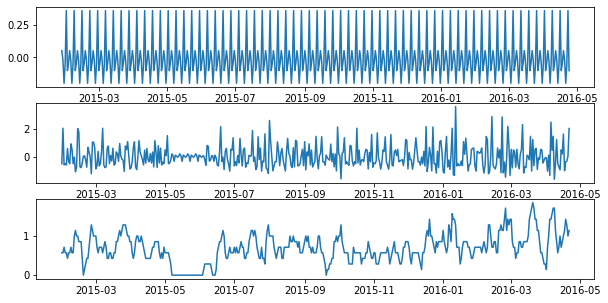

In [34]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(decomposition.seasonal)
ax[1].plot(decomposition.resid)
ax[2].plot(decomposition.trend)

In [23]:
item_df['sold'] = item_df['sold'].astype('int8')


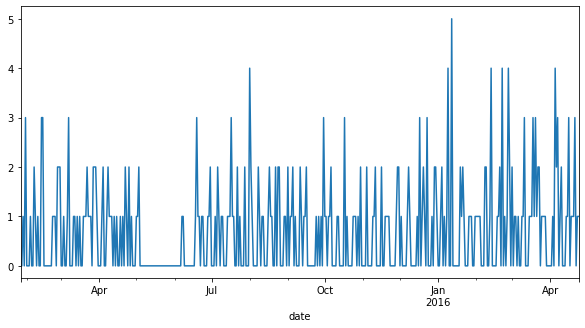

In [53]:
item_df['rolling_mean_7'] = item_df['sold'].transform(lambda x: x.shift(1).rolling(7).mean())
item_df['sold'].plot()

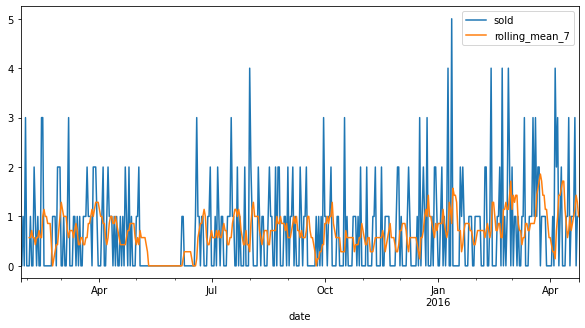

In [54]:
item_df[['sold', 'rolling_mean_7']].plot()

In [59]:
item_df['rolling_mean_7'].dropna(inplace=True)

In [60]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(item_df['rolling_mean_7'])
lag_pacf = pacf(item_df['rolling_mean_7'], method='ols') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


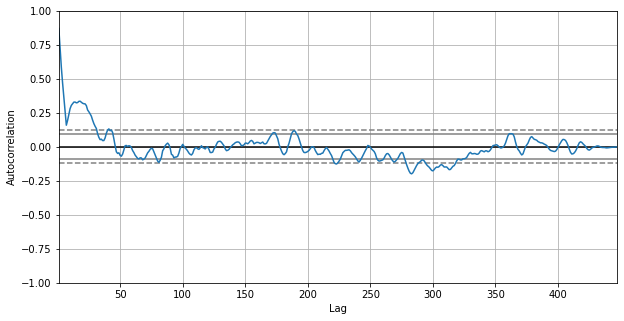

In [67]:
pd.plotting.autocorrelation_plot(item_df['rolling_mean_7'])

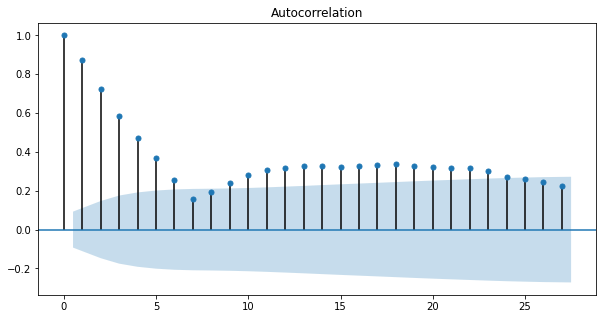

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(item_df['rolling_mean_7']);

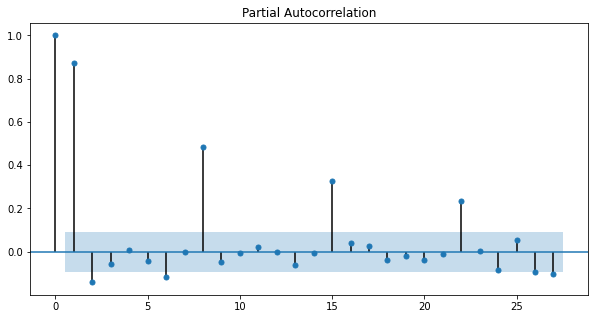

In [66]:
plot_pacf(item_df['rolling_mean_7']);